<a href="https://colab.research.google.com/github/DinhKhoi038/FoodReconization/blob/main/FaceRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#khai bao thu vien
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/BVN/FaceRec

/content/gdrive/MyDrive/BT AI/khuonmat


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/BVN/FaceRec/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 126 images belonging to 3 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/gdrive/MyDrive/BVN/FaceRec/Input',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 45 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Danh': 0, 'Khoi': 1, 'Sang': 2}

In [ ]:
validation.class_indices

{'Danh': 0, 'Khoi': 1, 'Sang': 2}

In [ ]:
#Tạo mạng CNN bằng tích chập
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
#Biên dịch Compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
4/4 [==============================] - 40s 9s/step - loss: 6.9080 - accuracy: 0.3492 - val_loss: 1.1868 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 24s 6s/step - loss: 1.0147 - accuracy: 0.5000 - val_loss: 0.7340 - val_accuracy: 0.7556
Epoch 3/50
4/4 [==============================] - 24s 6s/step - loss: 0.6421 - accuracy: 0.7937 - val_loss: 0.3531 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 24s 6s/step - loss: 0.2486 - accuracy: 0.9286 - val_loss: 0.1678 - val_accuracy: 0.9556
Epoch 5/50
4/4 [==============================] - 24s 6s/step - loss: 0.1311 - accuracy: 0.9683 - val_loss: 0.0467 - val_accuracy: 0.9778
Epoch 6/50
4/4 [==============================] - 25s 6s/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 24s 6s/step - loss: 0.0344 - accuracy: 0.9841 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 8/50
4/4 [==================

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0
Train Accuracy 1.0


In [ ]:
model.save("FaceRec.h5")

In [ ]:
model_CNN=load_model('FaceRec.h5')

1/1 [==============================] - 0s 176ms/step
Danh


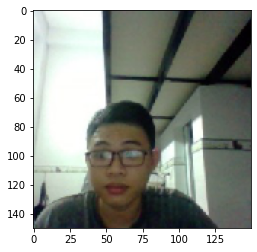

1/1 [==============================] - 0s 58ms/step
Danh


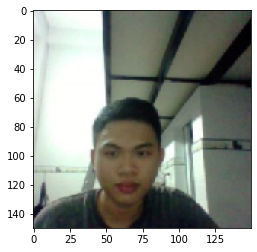

1/1 [==============================] - 0s 56ms/step
Khoi


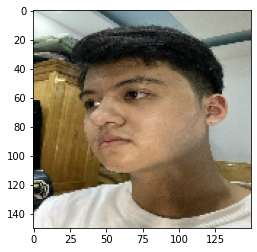

1/1 [==============================] - 0s 59ms/step
Khoi


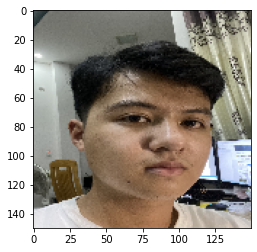

1/1 [==============================] - 0s 60ms/step
Sang


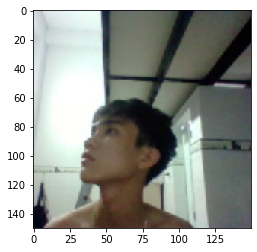

1/1 [==============================] - 0s 57ms/step
Sang


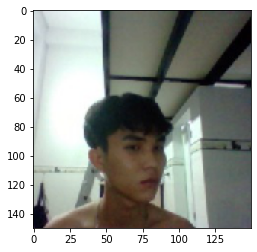

In [ ]:
test="/content/gdrive/MyDrive/BVN/FaceRec/Test/Testing1

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Danh'
  if round(result[0][1])==1:
    prediction='Khoi'
  if round(result[0][2])==1:
    prediction='Sang'
  print(prediction)
  plt.show()